In [ ]:
# cargando los paquetes
!pip install -U -q PyDrive
import os

from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive

from google.colab import auth
from PIL import Image
from oauth2client.client import GoogleCredentials

In [ ]:
#dando permiso para que lea mi data del drive
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
# Importando keras y para leer los archivos
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [ ]:
download = drive.CreateFile({'id': '1vUAaO4yJzfc7Se9EzxneqWuACg6ah8Gl'})

In [ ]:
download.GetContentFile('train_SOaYf6m.zip')

!unzip train_SOaYf6m.zip

Archive:  train_SOaYf6m.zip
   creating: images/
  inflating: images/0.jpg            
  inflating: images/1.jpg            
  inflating: images/10.jpg           
  inflating: images/100.jpg          
  inflating: images/1000.jpg         
  inflating: images/1001.jpg         
  inflating: images/1002.jpg         
  inflating: images/1003.jpg         
  inflating: images/1004.jpg         
  inflating: images/1005.jpg         
  inflating: images/1006.jpg         
  inflating: images/1007.jpg         
  inflating: images/1008.jpg         
  inflating: images/1009.jpg         
  inflating: images/101.jpg          
  inflating: images/1010.jpg         
  inflating: images/1011.jpg         
  inflating: images/1012.jpg         
  inflating: images/1013.jpg         
  inflating: images/1014.jpg         
  inflating: images/1015.jpg         
  inflating: images/1016.jpg         
  inflating: images/1017.jpg         
  inflating: images/1018.jpg         
  inflating: images/1019.jpg         
 

In [ ]:
# keras: deep learning
import keras

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten

from keras.layers import Conv2D, MaxPooling2D

from keras.utils import to_categorical

from keras.preprocessing import image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical

from tqdm import tqdm

Using TensorFlow backend.


In [ ]:
train = pd.read_csv('train.csv')
train.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [ ]:
#para tomar escalas de grises
from skimage.color import rgb2gray

In [ ]:
train_image = []

for i in tqdm(range(train.shape[0])):

    img = image.load_img('images/'+train['image_names'][i], target_size=(224,224,3), 
                        
                        grayscale=True
                         )
    
    img = image.img_to_array(img)

#255 para que la escala sea de 0 a 1
    img = img/255

    train_image.append(img)

X = np.array(train_image)

  0%|          | 0/1646 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 1646/1646 [00:02<00:00, 751.67it/s]


In [ ]:
#X = rgb2gray(X) 

In [ ]:
X.shape

(1646, 224, 224, 3)

In [ ]:
from tqdm import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import natsort
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from sklearn import model_selection
from keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [ ]:
X

array([[[[0.36862746, 0.3764706 , 0.28235295],
         [0.38431373, 0.39215687, 0.30980393],
         [0.43137255, 0.43529412, 0.38039216],
         ...,
         [0.10196079, 0.22352941, 0.23137255],
         [0.09019608, 0.23137255, 0.23137255],
         [0.05490196, 0.20784314, 0.20392157]],

        [[0.44705883, 0.45490196, 0.36078432],
         [0.40392157, 0.4117647 , 0.32941177],
         [0.37254903, 0.3764706 , 0.32156864],
         ...,
         [0.08627451, 0.19607843, 0.20784314],
         [0.09019608, 0.21176471, 0.21960784],
         [0.07450981, 0.20784314, 0.20392157]],

        [[0.3529412 , 0.36078432, 0.26666668],
         [0.40392157, 0.4117647 , 0.32941177],
         [0.4117647 , 0.41568628, 0.36078432],
         ...,
         [0.06666667, 0.14117648, 0.16470589],
         [0.08235294, 0.1764706 , 0.18431373],
         [0.08235294, 0.19215687, 0.19607843]],

        ...,

        [[0.30980393, 0.30588236, 0.29803923],
         [0.31764707, 0.3137255 , 0.30588236]

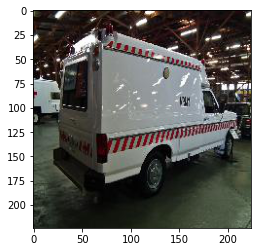

In [ ]:
plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


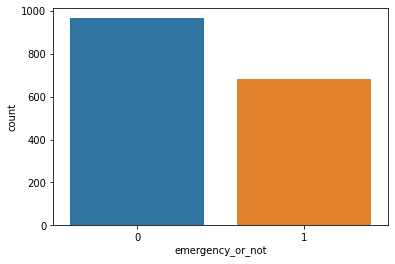

In [ ]:
sns.countplot(x= 'emergency_or_not' , data = train)

In [ ]:
y=train['emergency_or_not'].values

y = to_categorical(y)

In [ ]:
#tfms = get_transforms(do_flip=True , flip_vert= True , max_rotate=5.0 , max_zoom=1.1 , 
 #                    max_lighting =0.2 , max_warp = 0.2 , p_affine = 0.75 , p_lighting = 0.75)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1992, test_size=0.2)

In [ ]:
model=Sequential()
#capa 1
model.add(Conv2D(32,(3,3),padding="same",activation="linear",input_shape=(224,224,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

#capa 2
model.add(Conv2D(32,(3,3),padding="same",activation="linear"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#capa 3
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),padding="same",activation="linear"))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))

#elminando 0.25
#model.add(Dropout(0.2))

model.add(Flatten())

#numero de nueronas
#128
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
#0.5
#model.add(Dropout(0.4))

#sigmoid xq es binario
#yo tenia softmax pero es para multiclass
model.add(Dense(2, activation='sigmoid'))


In [ ]:
#para multiclass categorical_crossentropy
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=18, validation_data=(X_test, y_test))

Train on 1316 samples, validate on 330 samples
Epoch 1/18
1316/1316 [==============================] - 104s 79ms/step - loss: 0.2688 - accuracy: 0.9027 - val_loss: 2.9310 - val_accuracy: 0.5879
Epoch 2/18
1316/1316 [==============================] - 103s 78ms/step - loss: 0.1973 - accuracy: 0.9168 - val_loss: 0.7136 - val_accuracy: 0.5879
Epoch 3/18
1316/1316 [==============================] - 104s 79ms/step - loss: 0.2202 - accuracy: 0.9141 - val_loss: 0.7145 - val_accuracy: 0.5939
Epoch 4/18
1316/1316 [==============================] - 103s 78ms/step - loss: 0.1257 - accuracy: 0.9525 - val_loss: 2.3637 - val_accuracy: 0.5788
Epoch 5/18
1316/1316 [==============================] - 103s 78ms/step - loss: 0.1056 - accuracy: 0.9654 - val_loss: 1.3470 - val_accuracy: 0.5894
Epoch 6/18
1316/1316 [==============================] - 102s 78ms/step - loss: 0.0654 - accuracy: 0.9814 - val_loss: 0.8988 - val_accuracy: 0.6727
Epoch 7/18
1316/1316 [==============================] - 103s 78ms/step 

In [ ]:
## TEST

In [ ]:
download = drive.CreateFile({'id': '1OdOXq2sdgD6qlz1ReyBXuK_BSrWTWZ5b'})

download.GetContentFile('test_vc2kHdQ.csv')

In [ ]:
test =  pd.read_csv('test_vc2kHdQ.csv')

In [ ]:
test_image = []

for i in tqdm(range(test.shape[0])):

    img = image.load_img('images/'+test['image_names'][i], target_size=(224,224,3), grayscale=True)

    img = image.img_to_array(img)

    img = img/255

    test_image.append(img)

test = np.array(test_image)

# making predictions

prediction = model.predict_classes(test)

  0%|          | 0/706 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 706/706 [00:00<00:00, 739.14it/s]


In [ ]:
## cargando el sample

In [ ]:
download = drive.CreateFile({'id': '158_5B9rCFf82qqfyICcAvAPj9JLgyP3g'})

download.GetContentFile('sample_submission_yxjOnvz.csv')

# creating submission file

sample = pd.read_csv('sample_submission_yxjOnvz.csv')

sample['emergency_or_not'] = prediction

sample.to_csv('sample_cnn_4.csv', header=True, index=False)

In [ ]:
sample.head()

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,0
4,1907.jpg,0


In [ ]:
#biblio https://mp.weixin.qq.com/s/e2L9nba3NQiRn8QDTjjnDA